#  Data Manipulation Stuff

In [286]:
import pandas as pd
import numpy as np

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('Data.xlsx', sheet_name='Sheet1')

# Convert each column into a numpy array and skip the first row (assuming it's headers)
circle_number = df['Circle Number']
width = df['Width']
height = df['Height']
s = df['S']
factor = df['Factor']
square_width = df['Square Width']
square_height = df['Square Height']

# create a dataframe for the measure error which is 0.25 that is the same size as the other columns
measure_error = np.full(len(circle_number), 0.25)

In [289]:
new_width = width * (factor / square_width) * s
new_height = height * (factor / square_height) * s 

print(new_height)


0     17.105263
1     13.157895
2     26.315789
3     40.789474
4     52.631579
5     68.421053
6     25.000000
7     97.368421
8     33.552632
9     19.736842
10    47.368421
11    77.631579
dtype: float64


In [267]:
# Apply the error propagation formula
relative_error_width = measure_error / width
relative_error_square_width = measure_error / square_width

# Total relative error for each new length
total_relative_error = np.sqrt(relative_error_width**2 + relative_error_square_width**2)

# Calculate the propagated error in the new length
error_new_width = new_width * total_relative_error

print(error_new_width)



0     0.388206
1     0.379971
2     0.578704
3     0.548328
4     0.526253
5     0.759943
6     0.406926
7     0.767980
8     0.417309
9     0.602102
10    0.439882
11    0.776412
dtype: float64


In [268]:
# error propagation formula

# Apply the error propagation formula
relative_error_height = measure_error / height
relative_error_square_height = measure_error / square_height

# Total relative error for each new length
total_relative_error = np.sqrt(relative_error_height**2 + relative_error_square_height**2)

# Calculate the propagated error in the new length
error_new_height = new_height * total_relative_error

print(error_new_height)

0     0.398576
1     0.371726
2     0.477601
3     0.629490
4     0.766676
5     1.115044
6     0.465202
7     1.440210
8     0.550557
9     0.419104
10    0.704748
11    1.214999
dtype: float64


# The Gaussian Function

C:\Users\Qiren\AppData\Local\Temp\ipykernel_2020\845453510.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_fitted_curve, y_fitted_gaussian, 'r-', color='orange', label=f'Fitted Gaussian: $y(x)= {y_mu_gaussian:.2f} e^{{-(x-{mu_gaussian:.2f})^2/(2*{sigma_gaussian:.2f}^2)}}$')


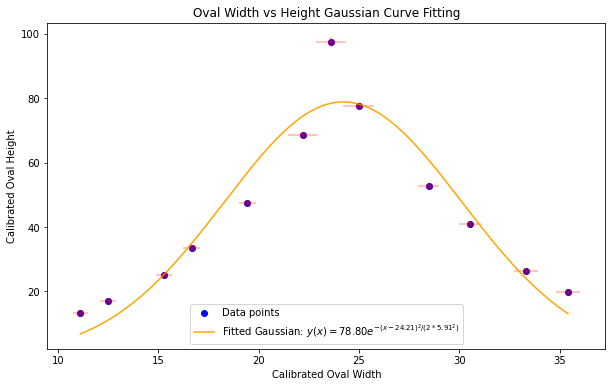

In [269]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data (replace these with your actual x and y lists)
x_values = new_width
y_values = new_height

# Define the Gaussian function
def gaussian_function(x, y_mu, mu, sigma):
    return y_mu * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Fit the Gaussian function to the data
params_gaussian, covariance_matrix = curve_fit(gaussian_function, x_values, y_values, p0=[max(y_values), np.mean(x_values), 1])

# Extract the fitted parameters for Gaussian
y_mu_gaussian, mu_gaussian, sigma_gaussian = params_gaussian

# Generate the fitted curves
x_fitted_curve = np.linspace(min(x_values), max(x_values), 1000)
y_fitted_gaussian = gaussian_function(x_fitted_curve, y_mu_gaussian, mu_gaussian, sigma_gaussian)

# make the plot bigger
plt.figure(figsize=(10, 6))

# Plot the original scatter points
plt.scatter(x_values, y_values, color='blue', label='Data points')

# Plot error bars
plt.errorbar(x_values, y_values, xerr=error_new_width, yerr=error_new_height, fmt='o', color='red', alpha=0.3)

# Plot the fitted Gaussian distribution curve
plt.plot(x_fitted_curve, y_fitted_gaussian, 'r-', color='orange', label=f'Fitted Gaussian: $y(x)= {y_mu_gaussian:.2f} e^{{-(x-{mu_gaussian:.2f})^2/(2*{sigma_gaussian:.2f}^2)}}$')

# Customize the plot
plt.title('Oval Width vs Height Gaussian Curve Fitting')
plt.xlabel('Calibrated Oval Width')
plt.ylabel('Calibrated Oval Height')
plt.legend()

# Show the plot
plt.show()


In [270]:
param_errors = np.sqrt(np.diag(covariance_matrix))
error_y_mu_gaussian = param_errors[0]
error_mu_gaussian = param_errors[1]
error_sigma_gaussian = param_errors[2]

print('Fitted y_mu:', y_mu_gaussian)
print('Fitted mu:', mu_gaussian)
print('Fitted sigma:', sigma_gaussian)
print('---------------------------------')
print('Error y_mu:', error_y_mu_gaussian)
print('Error mu:', error_mu_gaussian)
print('Error sigma:', error_sigma_gaussian)

Fitted y_mu: 78.80481572675887
Fitted mu: 24.211854054488192
Fitted sigma: 5.914721003273728
---------------------------------
Error y_mu: 4.811724918115826
Error mu: 0.4535341858052103
Error sigma: 0.43801578847271977


In [291]:
# Calculate the Chi-squared value
chi_squared = np.sum(((y_values - gaussian_function(x_values, y_mu_gaussian, mu_gaussian, sigma_gaussian))) ** 2  / gaussian_function(x_values, y_mu_gaussian, mu_gaussian, sigma_gaussian))
print('Chi-squared:', chi_squared)

Chi-squared: 2.330332798539906


In [293]:
import scipy.stats as stats
import scipy.special

cdf = scipy.special.chdtrc(9,chi_squared)
print('CDF:', cdf)


CDF: 0.012770867558809325


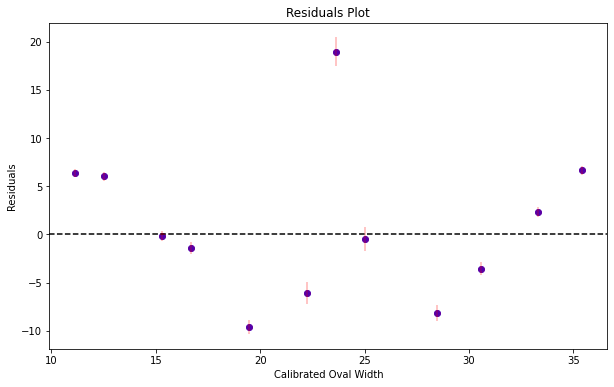

In [273]:
# Make the residuals plot
plt.figure(figsize=(10, 6))
residuals = y_values - gaussian_function(x_values, y_mu_gaussian, mu_gaussian, sigma_gaussian)

# find the residual error
residual_error = np.sqrt(error_new_height**2 + 0.25**2)
plt.errorbar(x_values, residuals, yerr=residual_error, fmt='o', color='red', alpha=0.3)

plt.scatter(x_values, residuals, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Calibrated Oval Width')
plt.ylabel('Residuals')
plt.show()


# Log Function Fit

C:\Users\Qiren\AppData\Local\Temp\ipykernel_2020\964813054.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_fitted_curve, y_fitted_lognormal, 'g-', color='orange', label=f'Fitted Lognormal: $y(x)= {y_mu_lognormal:.2f} / (x \cdot {sigma_lognormal:.2f} \cdot \sqrt{{2\pi}}) e^{{-(\ln(x)-{mu_lognormal:.2f})^2/(2*{sigma_lognormal:.2f}^2)}}$')


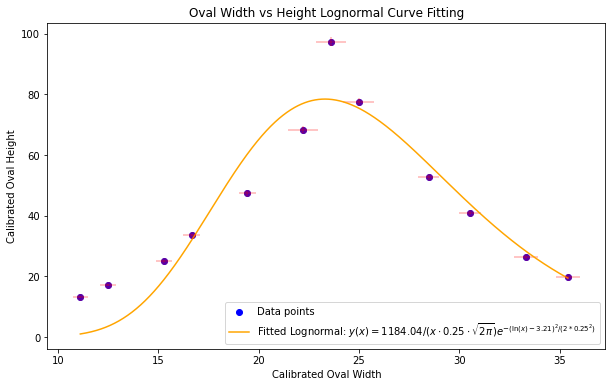

In [274]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data (replace these with your actual x and y lists)
x_values = new_width
y_values = new_height

# Define the Lognormal function
def lognormal_function(x, y_mu, mu, sigma):
    return (y_mu / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x) - mu) ** 2) / (2 * sigma ** 2))

# Fit the Lognormal function to the data
params_lognormal, covariance_matrix = curve_fit(lognormal_function, x_values, y_values, p0=[max(y_values), np.mean(np.log(x_values)), 1])

# Extract the fitted parameters for Lognormal
y_mu_lognormal, mu_lognormal, sigma_lognormal = params_lognormal

# Generate the fitted curves
x_fitted_curve = np.linspace(min(x_values), max(x_values), 1000)
y_fitted_lognormal = lognormal_function(x_fitted_curve, y_mu_lognormal, mu_lognormal, sigma_lognormal)

# make the plot bigger
plt.figure(figsize=(10, 6))

# Plot the original scatter points
plt.scatter(x_values, y_values, color='blue', label='Data points')

# Plot error bars
plt.errorbar(x_values, y_values, xerr=error_new_width, yerr=error_new_height, fmt='o', color='red', alpha=0.3)

# Plot the fitted Lognormal distribution curve
plt.plot(x_fitted_curve, y_fitted_lognormal, 'g-', color='orange', label=f'Fitted Lognormal: $y(x)= {y_mu_lognormal:.2f} / (x \cdot {sigma_lognormal:.2f} \cdot \sqrt{{2\pi}}) e^{{-(\ln(x)-{mu_lognormal:.2f})^2/(2*{sigma_lognormal:.2f}^2)}}$')

# Customize the plot
plt.title('Oval Width vs Height Lognormal Curve Fitting')
plt.xlabel('Calibrated Oval Width')
plt.ylabel('Calibrated Oval Height')
plt.legend()

# Show the plot
plt.show()

In [275]:
# Calculate the parameter errors
param_errors = np.sqrt(np.diag(covariance_matrix))
error_y_mu_lognormal = param_errors[0]
error_mu_lognormal = param_errors[1]
error_sigma_lognormal = param_errors[2]

print('Fitted y_mu:', y_mu_lognormal)
print('Fitted mu:', mu_lognormal)
print('Fitted sigma:', sigma_lognormal)
print('---------------------------------')
print('Error y_mu:', error_y_mu_lognormal)
print('Error mu:', error_mu_lognormal)
print('Error sigma:', error_sigma_lognormal)

Fitted y_mu: 1184.03953891022
Fitted mu: 3.2113565754591686
Fitted sigma: 0.2502793337070455
---------------------------------
Error y_mu: 102.61915039408167
Error mu: 0.025664509992445354
Error sigma: 0.023770857689087998


In [276]:
# Calculate the Chi-squared value
chi_squared = np.sum(((y_values - lognormal_function(x_values, y_mu_lognormal, mu_lognormal, sigma_lognormal))) ** 2 / lognormal_function(x_values, y_mu_lognormal, mu_lognormal, sigma_lognormal))
print('Chi-squared:', chi_squared)

Chi-squared: 213.8857440019074


In [277]:
cdf = scipy.special.chdtrc(9,chi_squared)
print('CDF:', cdf)

CDF: 4.0364539983813355e-41


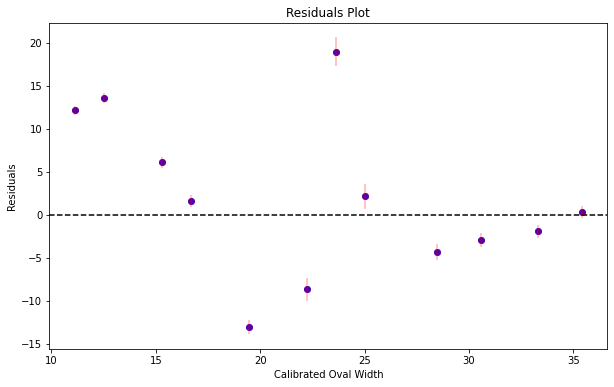

In [278]:
# Make the residuals plot
plt.figure(figsize=(10, 6))
residuals = y_values - lognormal_function(x_values, y_mu_lognormal, mu_lognormal, sigma_lognormal)

# plot residuals error
residual_error = np.sqrt(error_new_height**2 + error_new_width**2)
plt.errorbar(x_values, residuals, yerr=residual_error, fmt='o', color='red', alpha=0.3)

plt.scatter(x_values, residuals, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Calibrated Oval Width')
plt.ylabel('Residuals')
plt.show()

In [249]:
# Integrate the area under the lognormal curve
integral, error = quad(lognormal_function, min(x_values), max(x_values), args=(y_mu_lognormal, mu_lognormal, sigma_lognormal))

print('Integral under the Lognormal Curve:', integral)

Integral under the Lognormal Curve: 1091.4263229518087


# Laplacian Fit

C:\Users\Qiren\AppData\Local\Temp\ipykernel_2020\3165217312.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_fitted_curve, y_fitted_curve, 'r-',


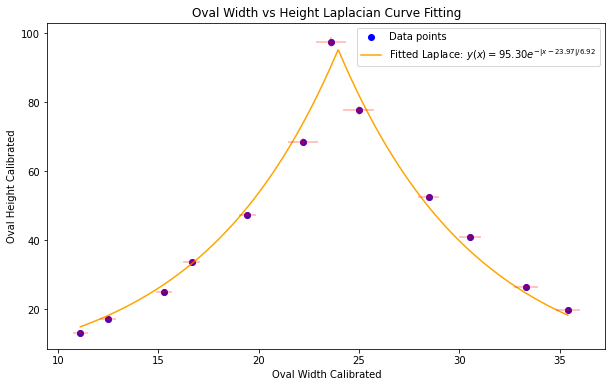

In [279]:
# Data (replace these with your actual x and y lists)
x_values = new_width
y_values = new_height

# Define the Laplacian function
def laplace_function(x, y_mu, mu, sigma):
    return y_mu * np.exp(-np.abs(x - mu) / sigma)

# Fit the Laplacian function to the data points
params, covariance_matrix = curve_fit(laplace_function, x_values, y_values, p0=[max(y_values), np.mean(x_values), 1])

# Extract the fitted parameters
y_mu_fitted, mu_fitted, sigma_fitted = params

# Generate the fitted curve
x_fitted_curve = np.linspace(min(x_values), max(x_values), 1000)
y_fitted_curve = laplace_function(x_fitted_curve, y_mu_fitted, mu_fitted, sigma_fitted)

# make the plot bigger
plt.figure(figsize=(10, 6))

# Plot the original scatter points
plt.scatter(x_values, y_values, color='blue', label='Data points')

# Plot the fitted Laplace distribution curve
plt.plot(x_fitted_curve, y_fitted_curve, 'r-', 
         label=f'Fitted Laplace: $y(x)= {y_mu_fitted:.2f} e^{{-|x-{mu_fitted:.2f}|/{sigma_fitted:.2f}}}$', color='orange')

#plot the error bars but make error bars fainter than the data points
plt.errorbar(x_values, y_values, xerr=error_new_width, yerr=error_new_height, fmt='o', color='red', alpha=0.3)
# Customize the plot
plt.title('Oval Width vs Height Laplacian Curve Fitting')
plt.xlabel('Oval Width Calibrated')
plt.ylabel('Oval Height Calibrated')
plt.legend()

# Show the plot
plt.show()

In [280]:
# Calculate the parameter errors
param_errors = np.sqrt(np.diag(covariance_matrix))
error_y_mu = param_errors[0]
error_mu = param_errors[1]
error_sigma = param_errors[2]

print('Fitted y_mu:', y_mu_fitted)
print('Fitted mu:', mu_fitted)
print('Fitted sigma:', sigma_fitted)
print('---------------------------------')
print('Error y_mu:', error_y_mu)
print('Error mu:', error_mu)
print('Error sigma:', error_sigma)

Fitted y_mu: 95.29962961107026
Fitted mu: 23.965883820636012
Fitted sigma: 6.918664438810802
---------------------------------
Error y_mu: 3.0812424355528973
Error mu: 0.16452319923398825
Error sigma: 0.379216960255896


In [281]:
# Calculate the Chi-squared value
chi_squared = np.sum(((y_values - laplace_function(x_values, y_mu_fitted, mu_fitted, sigma_fitted))) ** 2 /  laplace_function(x_values, y_mu_fitted, mu_fitted, sigma_fitted))
print('Chi-squared:', chi_squared)


Chi-squared: 2.5786842286813756


In [282]:
cdf = scipy.special.chdtrc(9,chi_squared)
print('CDF:', cdf)

CDF: 0.9786919625462415


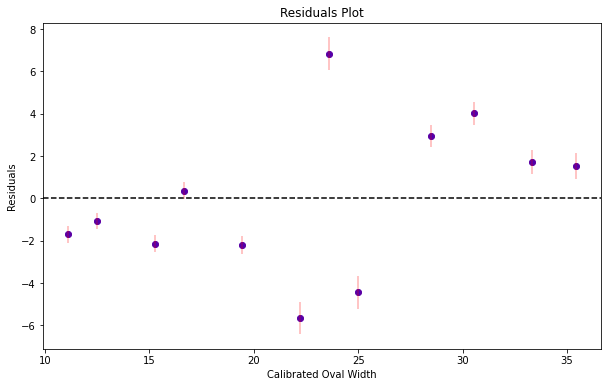

In [284]:
# Make the residuals plot
plt.figure(figsize=(10, 6))
residuals = y_values - laplace_function(x_values, y_mu_fitted, mu_fitted, sigma_fitted)

# calculate the residual error bars
residual_error = np.sqrt(error_new_width**2)

plt.errorbar(x_values, residuals, yerr=residual_error, fmt='o', color='red', alpha=0.3)

plt.scatter(x_values, residuals, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Calibrated Oval Width')
plt.ylabel('Residuals')
plt.show()

In [285]:
# Integrate the area under the Laplace curve
integral, error = quad(laplace_function, min(x_values), max(x_values), args=(y_mu_fitted, mu_fitted, sigma_fitted))

print('Integral under the Laplace Curve:', integral)

Integral under the Laplace Curve: 1089.8544507761771
